# STAGE 1 - DATA PREPROCESSING

## Data Pre-processing

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FINAL KEL 7/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Missing Value

In [5]:
df.isna().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

In [6]:
cats= ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
nums= ['CustomerID','ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']

In [7]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


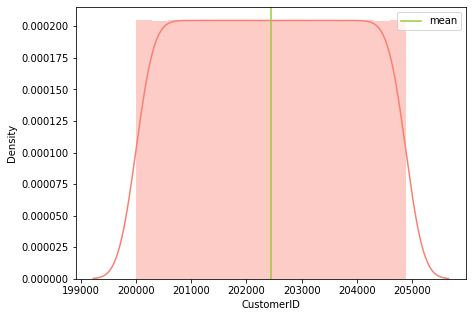

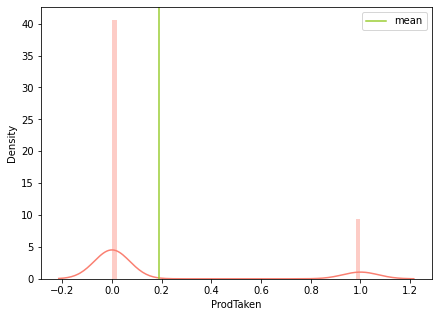

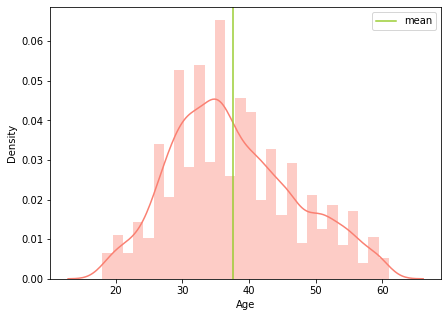

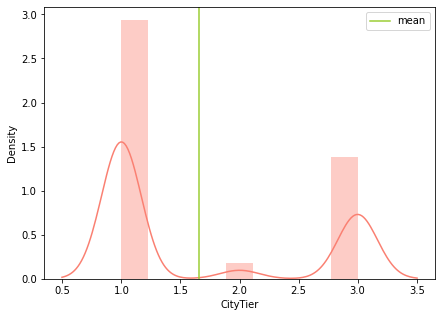

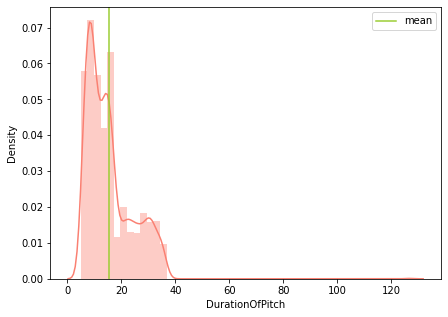

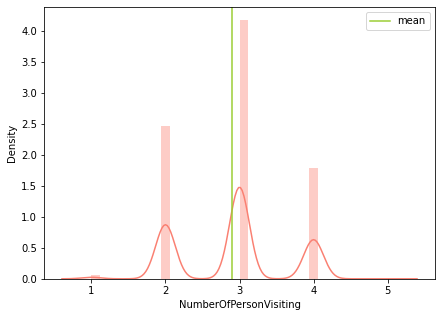

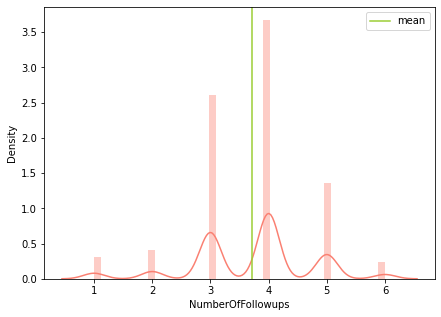

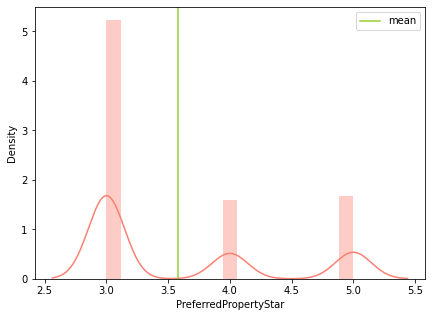

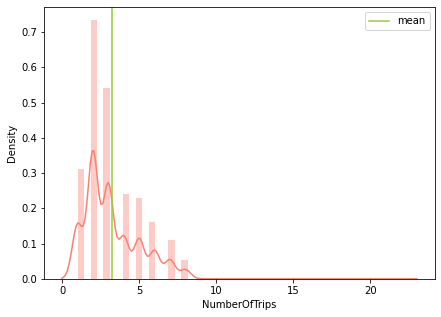

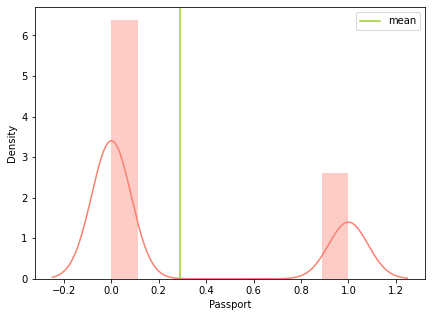

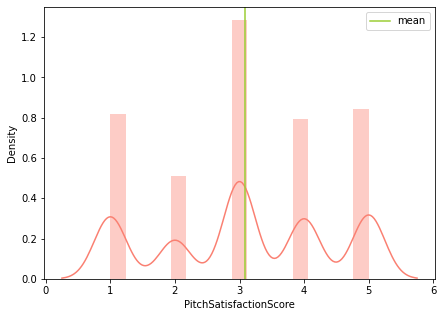

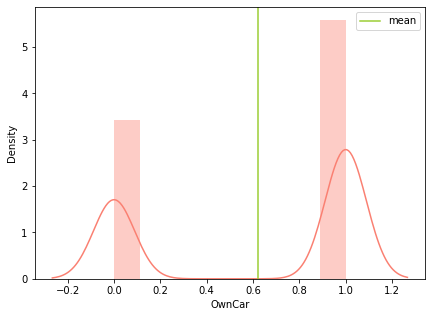

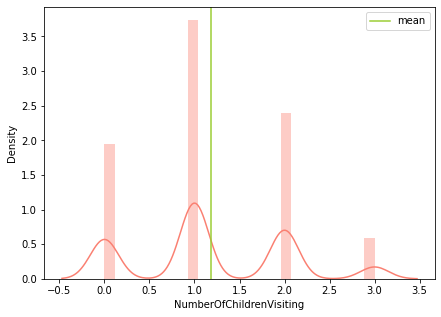

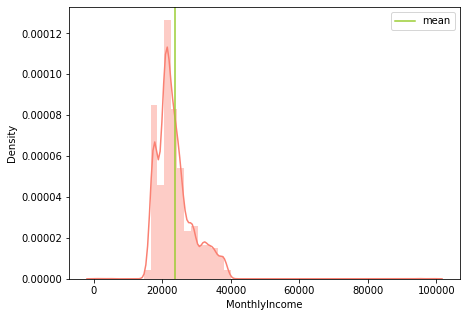

In [8]:
for col in nums:
  plt.figure(figsize=(7,5))
  plt.subplot(1,1,1)
  sns.distplot(df[col], color = 'salmon')
  plt.axvline(x = df[col].mean(), label = 'mean', color = 'yellowgreen')
  plt.legend()

In [9]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [10]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

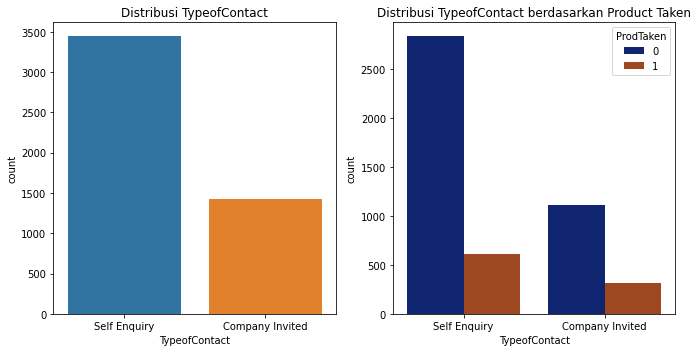

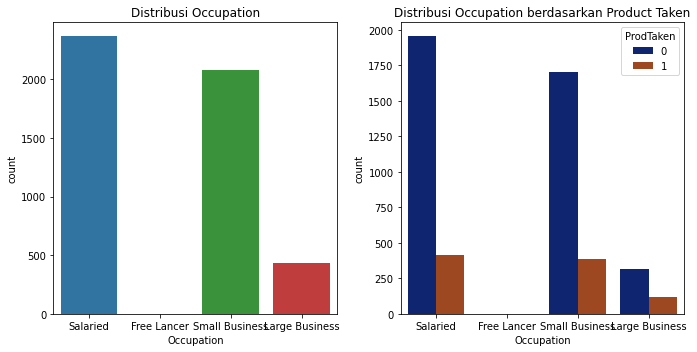

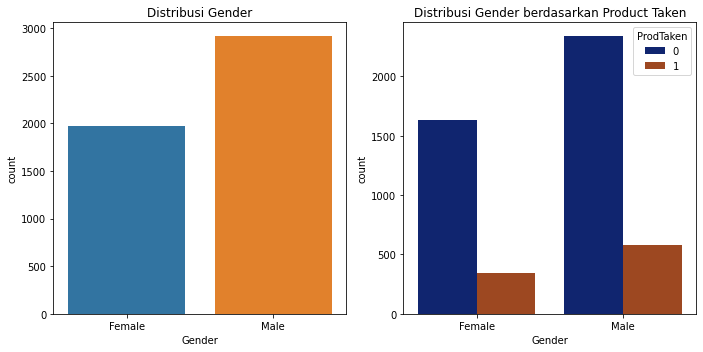

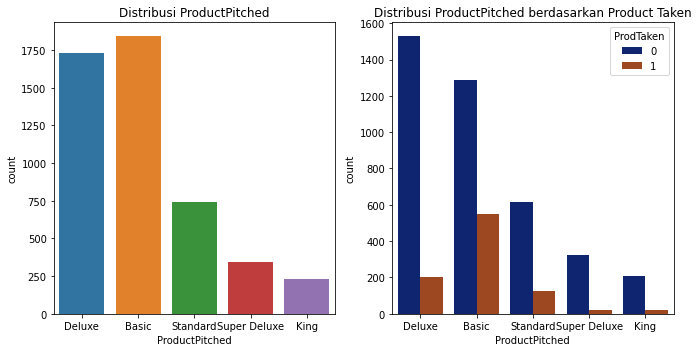

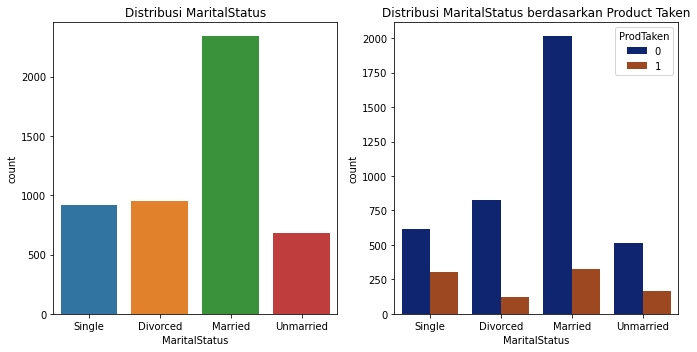

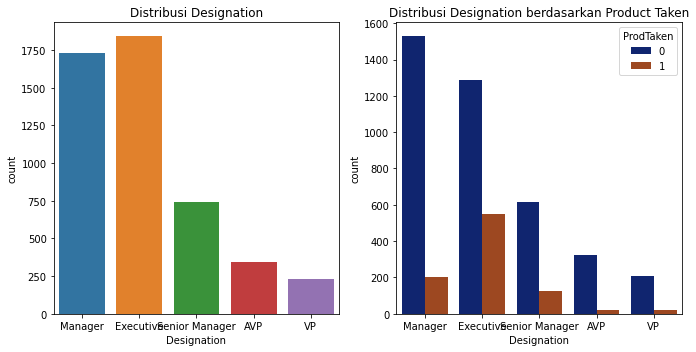

In [11]:
for col in cats:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.countplot(x = df[col])
  plt.title('Distribusi {}'.format(col))
  plt.subplot(1,2,2)
  sns.countplot(x = df[col], hue = df['ProdTaken'],palette='dark')
  plt.title('Distribusi {} berdasarkan Product Taken'.format(col))
  plt.tight_layout()
  plt.show()

In [12]:
# Numerical
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean())
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])
# Categorical
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

In [13]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

### Duplicated Value

In [15]:
df.duplicated().sum()

0

In [16]:
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

### Outliers

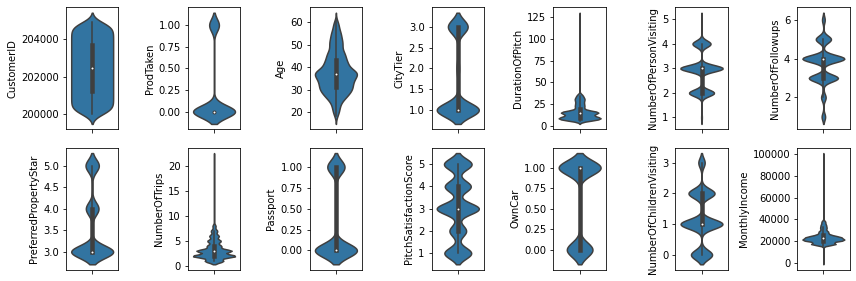

In [17]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.violinplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

In [18]:
#Handling outliers

dfx = df.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(dfx)}')

fil_ent = np.array([True] * len(dfx))
for col in ['DurationOfPitch']:
    Q1 = dfx[col].quantile(0.25)
    Q3 = dfx[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((dfx[col] >= low_limit) & (dfx[col] <= high_limit)) & fil_ent
    
dfx = dfx[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(dfx))

Jumlah baris sebelum memfilter outlier: 4888
Jumlah baris setelah memfilter outlier 4776


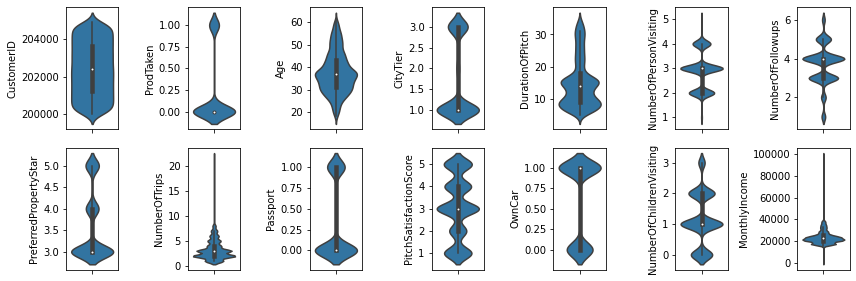

In [19]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.violinplot(y = dfx[nums[i]], orient='v')
    plt.tight_layout()

# Stage 2 - Exploratory Data Analysis

- Teknikal: Jumat/Sabtu + review stage 1
1.   Sebelum pre-processing
2.   Setelah pre-processing

Numerikal: 2 orang (numerik + grafis)

Kategorikal: 1 orang

- Non-Teknikal: Sabtu-Minggu --> Insight dan ppt
1.   Sebelum Pre-processing
2.   Setelah Pre-processing

- Persiapan Mentoring: Setelah kelas Sabtu (abis maghrib) --> Zoom

## EDA Sesudah Pre-Processing (Insight: Ichwan)

In [20]:
# drop feature
dfa = dfx.copy()
dfa = dfa.drop(columns = ['index', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'OwnCar'])
dfx = dfx.drop(columns = ['index', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'CustomerID', 'OwnCar'])

### Feature Numerical (Talenta)

#### Pendekatan Numerik (Descriptive Statistic)

In [21]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4776 non-null   int64  
 1   Age                     4776 non-null   float64
 2   TypeofContact           4776 non-null   object 
 3   CityTier                4776 non-null   int64  
 4   DurationOfPitch         4776 non-null   float64
 5   Occupation              4776 non-null   object 
 6   Gender                  4776 non-null   object 
 7   NumberOfFollowups       4776 non-null   float64
 8   ProductPitched          4776 non-null   object 
 9   PreferredPropertyStar   4776 non-null   float64
 10  MaritalStatus           4776 non-null   object 
 11  NumberOfTrips           4776 non-null   float64
 12  Passport                4776 non-null   int64  
 13  PitchSatisfactionScore  4776 non-null   int64  
 14  Designation             4776 non-null   

Dengan melakukan pendekatan numerik, info data yang sudah diolah sebelumnya secara keseluruhan sebagai berikut:


- Dataframe terdiri dari 4776 baris dan 16 kolom
- Sudah tidak ada data dengan null values di setiap feature
- Tipe data sesuai dengan feature nya

In [22]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfx_num=dfx.select_dtypes(include=numeric)
dfx_num.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
0,1,41.000000,3,6.0,3.0,3.0,1.0,1,2,20993.0
1,0,49.000000,1,14.0,4.0,4.0,2.0,0,3,20130.0
2,1,37.000000,1,8.0,4.0,3.0,7.0,1,3,17090.0
3,0,33.000000,1,9.0,3.0,3.0,2.0,1,5,17909.0
4,0,37.622265,1,8.0,3.0,4.0,1.0,0,5,18468.0


In [23]:
dfx_cat=dfx.select_dtypes(include='object')
dfx_cat.head(5)

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [24]:
dfx_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TypeofContact   4776 non-null   object
 1   Occupation      4776 non-null   object
 2   Gender          4776 non-null   object
 3   ProductPitched  4776 non-null   object
 4   MaritalStatus   4776 non-null   object
 5   Designation     4776 non-null   object
dtypes: object(6)
memory usage: 224.0+ KB


In [25]:
dfx_num.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
count,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000,4776.000000
mean,0.188233,37.570228,1.654104,14.985804,3.702889,3.577680,3.230033,0.293970,3.076424,23589.276925
std,0.390939,9.098733,0.916010,7.477835,0.997526,0.796745,1.824728,0.455626,1.368387,5262.805231
min,0.000000,18.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,3.000000,3.000000,2.000000,0.000000,2.000000,20465.250000
50%,0.000000,37.000000,1.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,22618.000000
75%,0.000000,43.000000,3.000000,18.000000,4.000000,4.000000,4.000000,1.000000,4.000000,25400.750000
max,1.000000,61.000000,3.000000,34.000000,6.000000,5.000000,22.000000,1.000000,5.000000,98678.000000


Berdasarkan hasil pengamatan statistical summary tipe data numerik adalah sebagai berikut:

- Terlihat nilai dikolom 'age, 'number of trip', ' number of children visiting','monthly income' & 'product pitched label' terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
- Keseluruhan data bernilai positif, tidak ada data yang bernilai negatif

In [26]:
dfx_cat.describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4776,4776,4776,4776,4776,4776
unique,2,4,2,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3394,2324,2843,1815,2289,1815


Berdasarkan hasil pengamatan statistical summary tipe data categorikal adalah sebagai berikut:

- Tipe kontrak terbanyak adalah tipe "self enquiry" dengan jumlah frekuensi 3318
- Mayoritas tipe pekerjaannya adalah "salaried" dengan frekuensi 2273
- Mayoritas dari responden pada data ini adalah "laki-laki" dengan jumlah frekuensi 2774
- Tipe product pitched terbanyak adalah tipe "basic" dengan frekuensi 1772
- Mayoritas dari responden sudah menikah dengan frekuensi 2238
- Tipe designation terbanyak adalah "executive" dengan frekuensi 1772

In [27]:
for col in dfx_cat:
  print(f'''Value count kolom {col}:''')
  print(dfx[col].value_counts())
  print()

Value count kolom TypeofContact:
Self Enquiry       3394
Company Invited    1382
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2324
Small Business    2028
Large Business     422
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male      2843
Female    1933
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1815
Deluxe          1679
Standard         725
Super Deluxe     327
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2289
Divorced      923
Single        901
Unmarried     663
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1815
Manager           1679
Senior Manager     725
AVP                327
VP                 230
Name: Designation, dtype: int64




Berdasarkan hasil value count sesuai dengan hasil statistical summary pada tipe kategorikal.

#### Pendekatan Grafis

In [28]:
dfx_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4776 non-null   int64  
 1   Age                     4776 non-null   float64
 2   CityTier                4776 non-null   int64  
 3   DurationOfPitch         4776 non-null   float64
 4   NumberOfFollowups       4776 non-null   float64
 5   PreferredPropertyStar   4776 non-null   float64
 6   NumberOfTrips           4776 non-null   float64
 7   Passport                4776 non-null   int64  
 8   PitchSatisfactionScore  4776 non-null   int64  
 9   MonthlyIncome           4776 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 373.2 KB


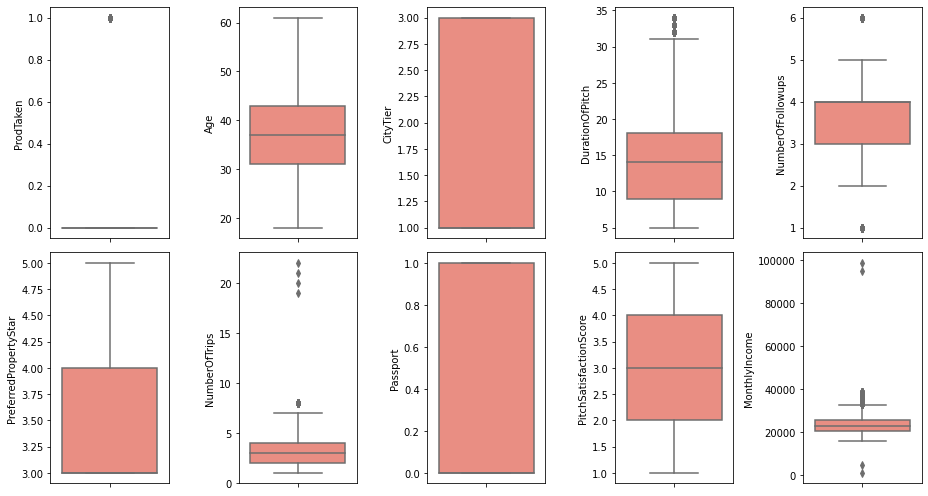

In [29]:
plt.figure(figsize=(13, 7))
for i, k in enumerate(dfx_num):
  plt.subplot(2, 5, i+1)
  sns.boxplot(y=dfx_num[k], color='salmon', orient = 'v')
  plt.tight_layout()

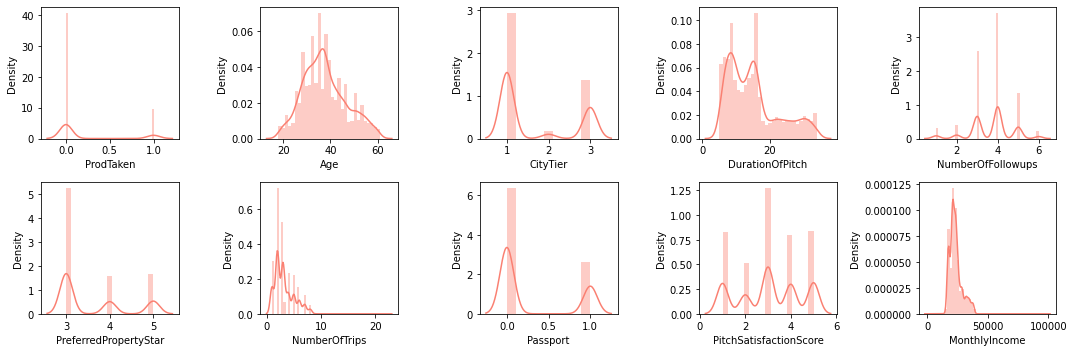

In [30]:
plt.figure(figsize=(15, 5))
for i, k in enumerate(dfx_num):
  plt.subplot(2, 5, i+1)
  sns.distplot(dfx_num[k], color='salmon')
  plt.tight_layout()

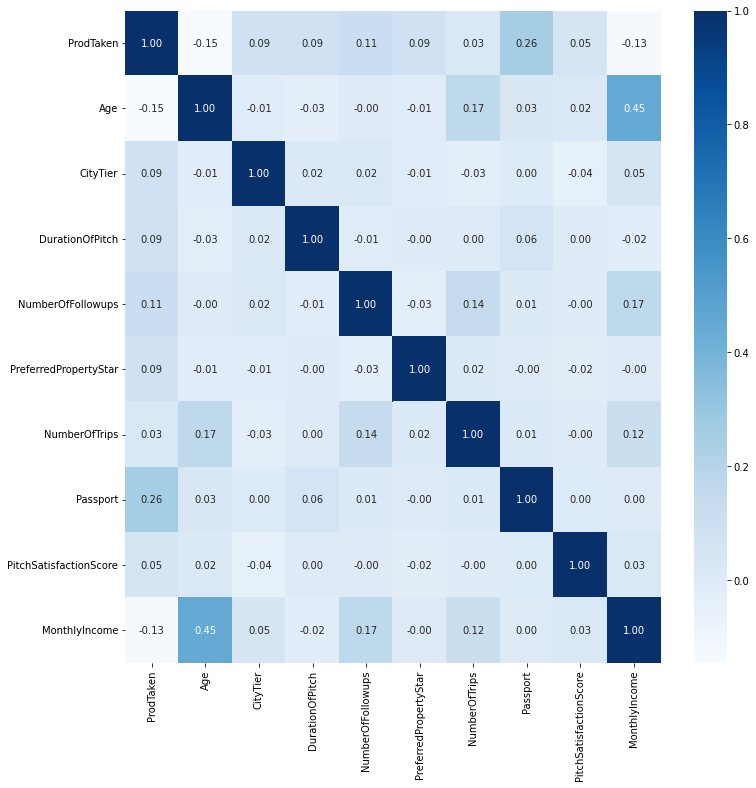

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfx.corr(), cmap='Blues', annot=True, fmt='.2f')

### Feature Categorical (Rany)

In [32]:
dfx[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4776,4776,4776,4776,4776,4776
unique,2,4,2,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3394,2324,2843,1815,2289,1815


In [33]:
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(dfx[col].value_counts())
  print()

Value count kolom TypeofContact:
Self Enquiry       3394
Company Invited    1382
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2324
Small Business    2028
Large Business     422
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male      2843
Female    1933
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1815
Deluxe          1679
Standard         725
Super Deluxe     327
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2289
Divorced      923
Single        901
Unmarried     663
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1815
Manager           1679
Senior Manager     725
AVP                327
VP                 230
Name: Designation, dtype: int64



In [34]:
dfx_selected = dfx[dfx['ProdTaken'] == 1]
dfa_selected = dfa[dfa['ProdTaken'] == 1]

NameError: ignored

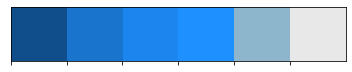

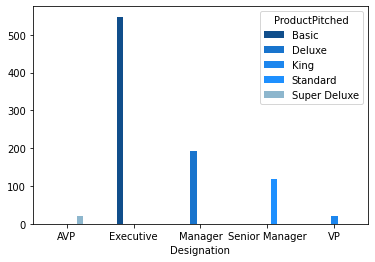

In [35]:
flatui = ["#104E8B","#1874CD","#1C86EE","#1E90FF", "#8DB6CD", "#e8e8e8" ] #Membuat Color Palette
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
data = dfx_selected.groupby(['Designation','ProductPitched']).size().unstack().plot(kind='bar', rot = 0)
ax.set_title("Distribution of Designation and ProductPitched (ProdTaken = 1)")
ax.set_ylabel("Total Customer")
ax.set_xlabel("Designation")
ax.legend()
plt.tight_layout()

In [ ]:
ax = dfx_selected.groupby(['CityTier','Passport']).size().unstack().plot(kind='bar', rot = 0)
ax.set_title("Distribution of City Tier and Passport (ProdTaken = 1)")
ax.set_ylabel("Total Customer")
ax.set_xlabel("City Tier")
ax.legend(['No Passport', 'Have Passport'])
plt.tight_layout()

In [ ]:
dfa1 = dfa_selected.groupby('MaritalStatus').agg({'CustomerID':'count'}).reset_index()
ax = sns.barplot(x='MaritalStatus', y='CustomerID', data = dfa1)
ax.set_title("Distribution of Marital Status (ProdTaken = 1)")
ax.set_ylabel("Total Customer")
ax.set_xlabel("Marital Status")
plt.tight_layout()

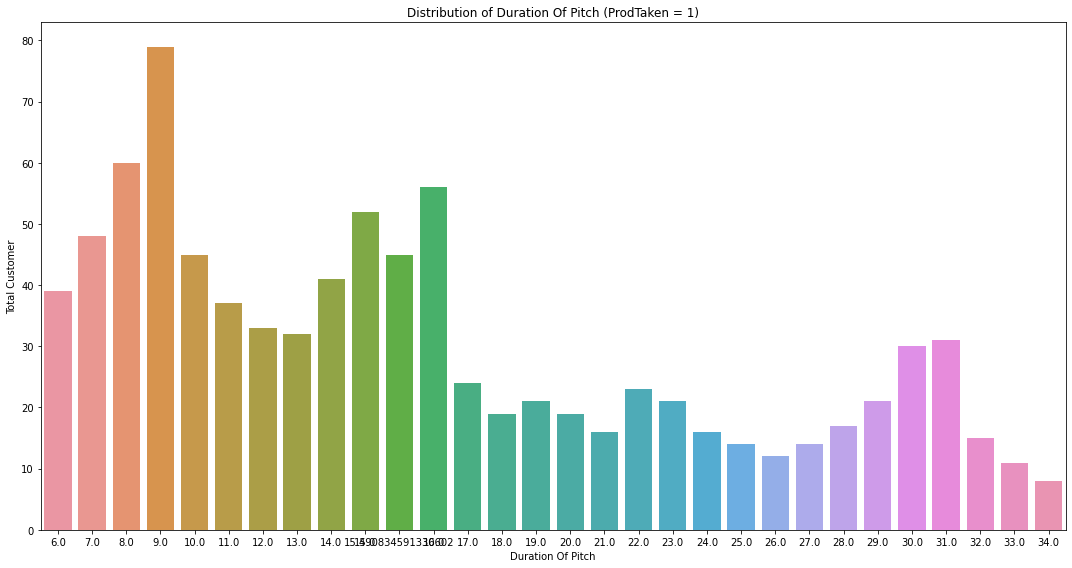

In [36]:
plt.figure(figsize=(15, 8))
dfa1 = dfa_selected.groupby('DurationOfPitch').agg({'CustomerID':'count'}).reset_index()
ax = sns.barplot(x='DurationOfPitch', y='CustomerID', data = dfa1)
ax.set_title("Distribution of Duration Of Pitch (ProdTaken = 1)")
ax.set_ylabel("Total Customer")
ax.set_xlabel("Duration Of Pitch")
plt.tight_layout()

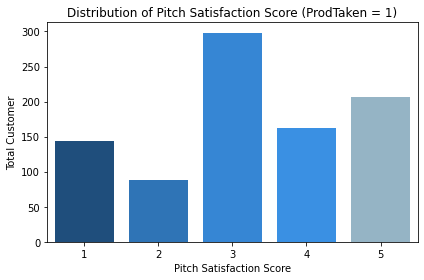

In [37]:
dfa1 = dfa_selected.groupby('PitchSatisfactionScore').agg({'CustomerID':'count'}).reset_index()
ax = sns.barplot(x='PitchSatisfactionScore', y='CustomerID', data = dfa1)
ax.set_title("Distribution of Pitch Satisfaction Score (ProdTaken = 1)")
ax.set_ylabel("Total Customer")
ax.set_xlabel("Pitch Satisfaction Score")
plt.tight_layout()

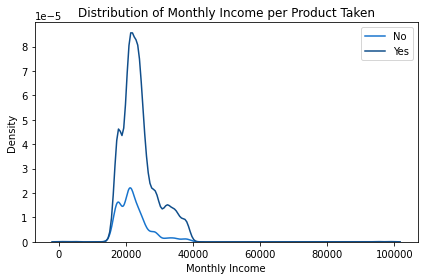

In [38]:
ax = sns.kdeplot(x = 'MonthlyIncome', data=dfx, hue = 'ProdTaken')
ax.set_title("Distribution of Monthly Income per Product Taken")
ax.set_ylabel("Density")
ax.set_xlabel("Monthly Income")
ax.legend(["No", "Yes"])
plt.tight_layout()

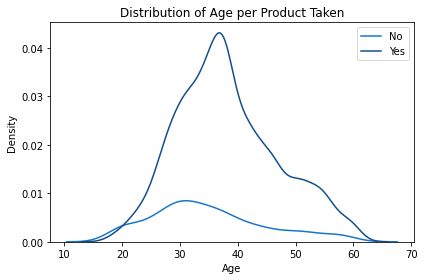

In [39]:
ax = sns.kdeplot(x = 'Age', data=dfx, hue = 'ProdTaken')
ax.set_title("Distribution of Age per Product Taken")
ax.set_ylabel("Density")
ax.set_xlabel("Age")
ax.legend(["No", "Yes"])
plt.tight_layout()

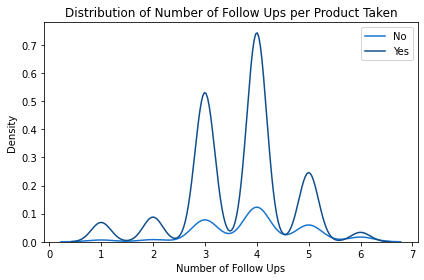

In [40]:
ax = sns.kdeplot(x = 'NumberOfFollowups', data=dfx, hue = 'ProdTaken')
ax.set_title("Distribution of Number of Follow Ups per Product Taken")
ax.set_ylabel("Density")
ax.set_xlabel("Number of Follow Ups")
ax.legend(["No", "Yes"])
plt.tight_layout()

# Model Building

In [41]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4776 non-null   int64  
 1   Age                     4776 non-null   float64
 2   TypeofContact           4776 non-null   object 
 3   CityTier                4776 non-null   int64  
 4   DurationOfPitch         4776 non-null   float64
 5   Occupation              4776 non-null   object 
 6   Gender                  4776 non-null   object 
 7   NumberOfFollowups       4776 non-null   float64
 8   ProductPitched          4776 non-null   object 
 9   PreferredPropertyStar   4776 non-null   float64
 10  MaritalStatus           4776 non-null   object 
 11  NumberOfTrips           4776 non-null   float64
 12  Passport                4776 non-null   int64  
 13  PitchSatisfactionScore  4776 non-null   int64  
 14  Designation             4776 non-null   

In [42]:
dfm1 = dfx.copy()

In [43]:
dfm1

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,Manager,26576.0
4772,1,28.000000,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,Executive,21212.0
4773,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,Senior Manager,31820.0
4774,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,Executive,20289.0


In [44]:
dfm1.drop(columns=['ProductPitched','TypeofContact'], inplace=True)
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4776 non-null   int64  
 1   Age                     4776 non-null   float64
 2   CityTier                4776 non-null   int64  
 3   DurationOfPitch         4776 non-null   float64
 4   Occupation              4776 non-null   object 
 5   Gender                  4776 non-null   object 
 6   NumberOfFollowups       4776 non-null   float64
 7   PreferredPropertyStar   4776 non-null   float64
 8   MaritalStatus           4776 non-null   object 
 9   NumberOfTrips           4776 non-null   float64
 10  Passport                4776 non-null   int64  
 11  PitchSatisfactionScore  4776 non-null   int64  
 12  Designation             4776 non-null   object 
 13  MonthlyIncome           4776 non-null   float64
dtypes: float64(6), int64(4), object(4)
memor

In [45]:
cat=['Occupation','MaritalStatus', 'Designation']
dfm1[cat] = dfm1[cat].astype('category')

In [46]:
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ProdTaken               4776 non-null   int64   
 1   Age                     4776 non-null   float64 
 2   CityTier                4776 non-null   int64   
 3   DurationOfPitch         4776 non-null   float64 
 4   Occupation              4776 non-null   category
 5   Gender                  4776 non-null   object  
 6   NumberOfFollowups       4776 non-null   float64 
 7   PreferredPropertyStar   4776 non-null   float64 
 8   MaritalStatus           4776 non-null   category
 9   NumberOfTrips           4776 non-null   float64 
 10  Passport                4776 non-null   int64   
 11  PitchSatisfactionScore  4776 non-null   int64   
 12  Designation             4776 non-null   category
 13  MonthlyIncome           4776 non-null   float64 
dtypes: category(3), float64(

In [47]:
#label encoding untuk gender
dfm1['gender_label'] = dfm1['Gender'].astype('category').cat.codes

#one hot encoding pada feature categorical occupation, designation, maritalstatus
for i in cat:
  onehots = pd.get_dummies(dfm1[i], prefix=i)
  dfm1 = dfm1.join(onehots)

In [48]:
dfm1.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,gender_label,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,3,6.0,Salaried,Female,3.0,3.0,Single,1.0,1,2,Manager,20993.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,49.000000,1,14.0,Salaried,Male,4.0,4.0,Divorced,2.0,0,3,Manager,20130.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,Free Lancer,Male,4.0,3.0,Single,7.0,1,3,Executive,17090.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,33.000000,1,9.0,Salaried,Female,3.0,3.0,Divorced,2.0,1,5,Executive,17909.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,Small Business,Male,3.0,4.0,Divorced,1.0,0,5,Executive,18468.0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [49]:
dfm1.drop(columns=['Occupation', 'MaritalStatus', 'Designation','Gender'], inplace=True)
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ProdTaken                   4776 non-null   int64  
 1   Age                         4776 non-null   float64
 2   CityTier                    4776 non-null   int64  
 3   DurationOfPitch             4776 non-null   float64
 4   NumberOfFollowups           4776 non-null   float64
 5   PreferredPropertyStar       4776 non-null   float64
 6   NumberOfTrips               4776 non-null   float64
 7   Passport                    4776 non-null   int64  
 8   PitchSatisfactionScore      4776 non-null   int64  
 9   MonthlyIncome               4776 non-null   float64
 10  gender_label                4776 non-null   int8   
 11  Occupation_Free Lancer      4776 non-null   uint8  
 12  Occupation_Large Business   4776 non-null   uint8  
 13  Occupation_Salaried         4776 

In [50]:
# Normalisasi Data
features = dfm1.drop(columns = 'ProdTaken')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    dfm1[var]= MinMaxScaler().fit_transform(dfm1[var].values.reshape(len(dfm1), 1))

In [51]:
X = dfm1.drop(['ProdTaken'], axis=1)
y = dfm1['ProdTaken']

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=1/3, random_state=42)

In [53]:
## Handling class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
Xtrain_oversampled, ytrain_oversampled = sm.fit_sample(Xtrain, ytrain)
Xtrain = pd.DataFrame(Xtrain_oversampled, columns=Xtrain.columns)
ytrain = pd.Series(ytrain_oversampled)

In [54]:
print('Shape of Training set : ',Xtrain.shape )
print('Shape of test set : ',Xtest.shape )
print('Percentage of classes in training set:\n',ytrain.value_counts(normalize=True)*100)
print('Percentage of classes in test set:\n',ytest.value_counts(normalize=True)*100)

Shape of Training set :  (5182, 23)
Shape of test set :  (1592, 23)
Percentage of classes in training set:
 1    50.0
0    50.0
dtype: float64
Percentage of classes in test set:
 0    80.778894
1    19.221106
Name: ProdTaken, dtype: float64


In [55]:
## membuat function untuk melakukan evaluasi pada setiap model
def eval_classification(model, Xtrain, ytrain, Xtest, ytest, threshold=0.5, flag=True, roc=True ):
    score=[] 
    
    pred_train = (model.predict_proba(Xtrain)[:,1]>threshold)
    pred_test = (model.predict_proba(Xtest)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,ytrain)
    test_acc = accuracy_score(pred_test,ytest)
    
    train_recall = recall_score(ytrain,pred_train)
    test_recall = recall_score(ytest,pred_test)
    
    train_precision = precision_score(ytrain,pred_train)
    test_precision = precision_score(ytest,pred_test)
    
    train_f1 = f1_score(ytrain,pred_train)
    test_f1 = f1_score(ytest,pred_test)
    
    
    score.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1,pred_train,pred_test))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,ytrain))
        print("Accuracy on test set : ",accuracy_score(pred_test,ytest))
        print("Recall on training set : ",recall_score(ytrain,pred_train))
        print("Recall on test set : ",recall_score(ytest,pred_test))
        print("Precision on training set : ",precision_score(ytrain,pred_train))
        print("Precision on test set : ",precision_score(ytest,pred_test))
        print("F1 on training set : ",f1_score(ytrain,pred_train))
        print("F1 on test set : ",f1_score(ytest,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(Xtrain)[:,1]
        pred_test_prob = model.predict_proba(Xtest)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(ytrain,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(ytest,pred_test))
    
    return score # returning the list with train and test scores

In [56]:
## Fungsi untuk menyimpan hasil evaluasi pada masing-masing list yang sudah disediakan
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])

In [57]:
## Fungsi untuk mengeluarkan confusion matrix
def confusion_matrix(model,test_X,y_actual,i,seg,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - Purchased', 'Actual - Not Purchased']],
                  columns = [i for i in ['Predicted - Purchased','Predicted - Not Purchased']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', ax=axes[i], cmap='Blues').set(title='Confusion Matrix of {} Set'.format(seg))

In [58]:
## fungsi untuk show feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8),  color='green', align='center')
    ax.invert_yaxis()

    plt.title('Feature Importances')
    plt.xlabel('Relative Importance')


## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(Xtrain, ytrain)

logistic_regression_score = eval_classification(model, Xtrain, ytrain, Xtest, ytest)
add_score_model(logistic_regression_score)

Accuracy on training set :  0.7483597066769587
Accuracy on test set :  0.7368090452261307
Recall on training set :  0.7564646854496333
Recall on test set :  0.761437908496732
Precision on training set :  0.7443980250664641
Precision on test set :  0.40241796200345425
F1 on training set :  0.7503828483920368
F1 on test set :  0.5265536723163842
ROC-AUC Score on training set :  0.7483597066769586
ROC-AUC Score on test set :  0.7461932932841359


In [60]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7483597066769587
Test score:0.7368090452261307


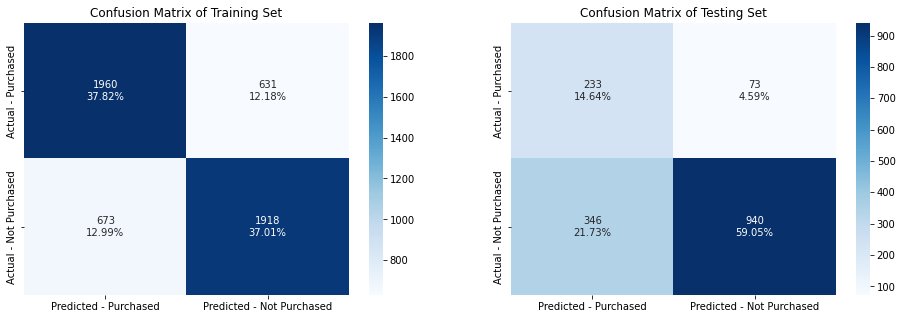

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [61]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(model, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(model, Xtest, ytest, i = 1, seg = 'Testing')

## Logistic Regression - GridSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji dan scorer
penalty = ['l2','l1','elasticnet','none']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)
scorer = metrics.make_scorer(metrics.precision_score)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
grid_obj = GridSearchCV(logres, hyperparameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(Xtrain, ytrain)
logres = grid_obj.best_estimator_

# Fitting Model & Evaluation
logres.fit(Xtrain, ytrain)
logregrandom_score = eval_classification(logres, Xtrain, ytrain, Xtest, ytest)
add_score_model(logregrandom_score)

Accuracy on training set :  0.7491316094172135
Accuracy on test set :  0.7361809045226131
Recall on training set :  0.7576225395600155
Recall on test set :  0.7581699346405228
Precision on training set :  0.7449715370018976
Precision on test set :  0.4013840830449827
F1 on training set :  0.7512437810945274
F1 on test set :  0.5248868778280543
ROC-AUC Score on training set :  0.7491316094172134
ROC-AUC Score on test set :  0.7445593063560314


In [63]:
print('Best algorithm:', model.get_params()['penalty'])
print('Best C:', model.get_params()['C'])

Best algorithm: l2
Best C: 1.0


In [64]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7483597066769587
Test score:0.7368090452261307


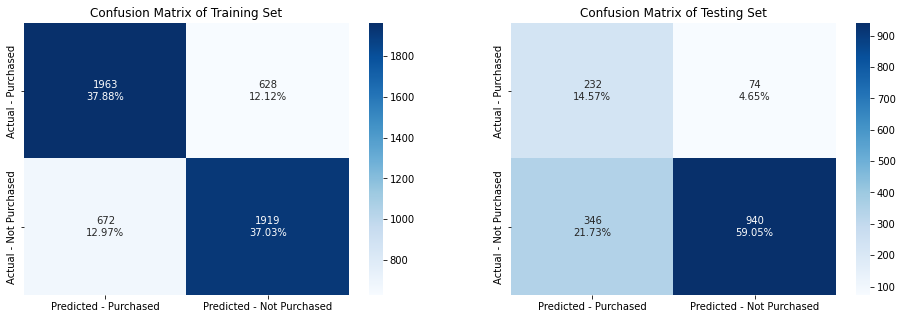

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [65]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(logres, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(logres, Xtest, ytest, i = 1, seg = 'Testing')

## kNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
 knn_score = eval_classification(knn, Xtrain, ytrain, Xtest, ytest)
 add_score_model(knn_score)

Accuracy on training set :  0.9423002701659591
Accuracy on test set :  0.8291457286432161
Recall on training set :  0.9949826321883443
Recall on test set :  0.8954248366013072
Precision on training set :  0.9001396648044693
Precision on test set :  0.5330739299610895
F1 on training set :  0.9451879010082492
F1 on test set :  0.6682926829268293
ROC-AUC Score on training set :  0.9423002701659591
ROC-AUC Score on test set :  0.8543998211000314


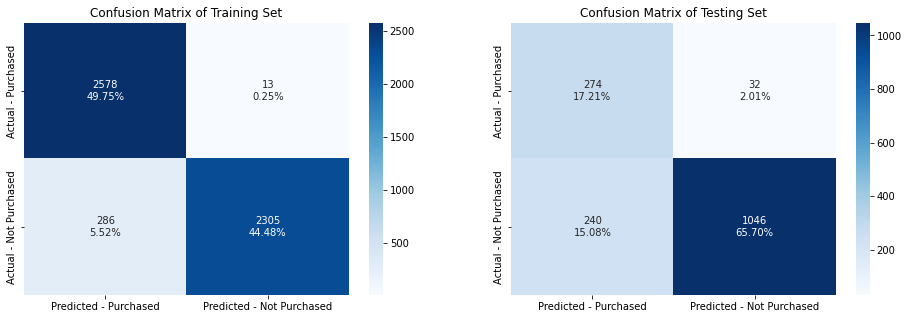

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [68]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(knn, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(knn, Xtest, ytest, i = 1, seg = 'Testing')

## kNN - GridSearchCV

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,15))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)
scorer = metrics.make_scorer(metrics.precision_score)

# Inisiasi model
knnt = KNeighborsClassifier()
grid_obj = GridSearchCV(knnt, hyperparameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(Xtrain, ytrain)
knnt = grid_obj.best_estimator_

# Fit Model & Evaluasi
knnt.fit(Xtrain, ytrain)
knnt_score = eval_classification(knnt, Xtrain, ytrain, Xtest, ytest)
add_score_model(knnt_score)

Accuracy on training set :  0.995175607873408
Accuracy on test set :  0.9258793969849246
Recall on training set :  0.990351215746816
Recall on test set :  0.7941176470588235
Precision on training set :  1.0
Precision on test set :  0.8154362416107382
F1 on training set :  0.9951522202831103
F1 on test set :  0.804635761589404
ROC-AUC Score on training set :  0.995175607873408
ROC-AUC Score on test set :  0.8756746866709358


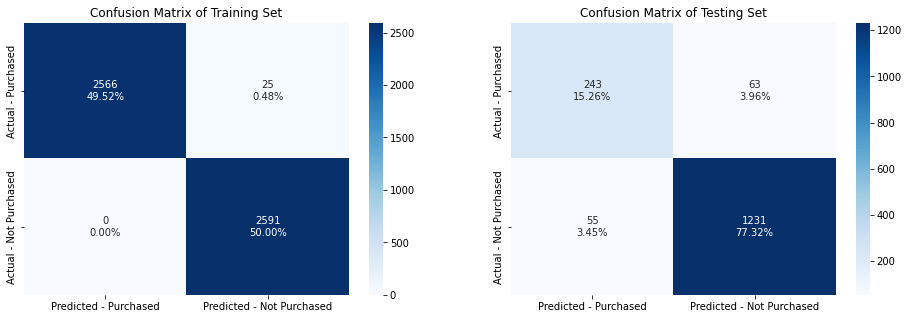

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [70]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(knnt, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(knnt, Xtest, ytest, i = 1, seg = 'Testing')

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [72]:
dtree_score = eval_classification(dtree, Xtrain, ytrain, Xtest, ytest)
add_score_model(dtree_score)

Accuracy on training set :  1.0
Accuracy on test set :  0.8687185929648241
Recall on training set :  1.0
Recall on test set :  0.7156862745098039
Precision on training set :  1.0
Precision on test set :  0.6422287390029325
F1 on training set :  1.0
F1 on test set :  0.6769706336939723
ROC-AUC Score on training set :  1.0
ROC-AUC Score on test set :  0.8104092336779192


In [73]:
## visualisasi decision tree
feature_names = list(Xtrain.columns)
print(feature_names)
from sklearn import tree

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'MonthlyIncome', 'gender_label', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


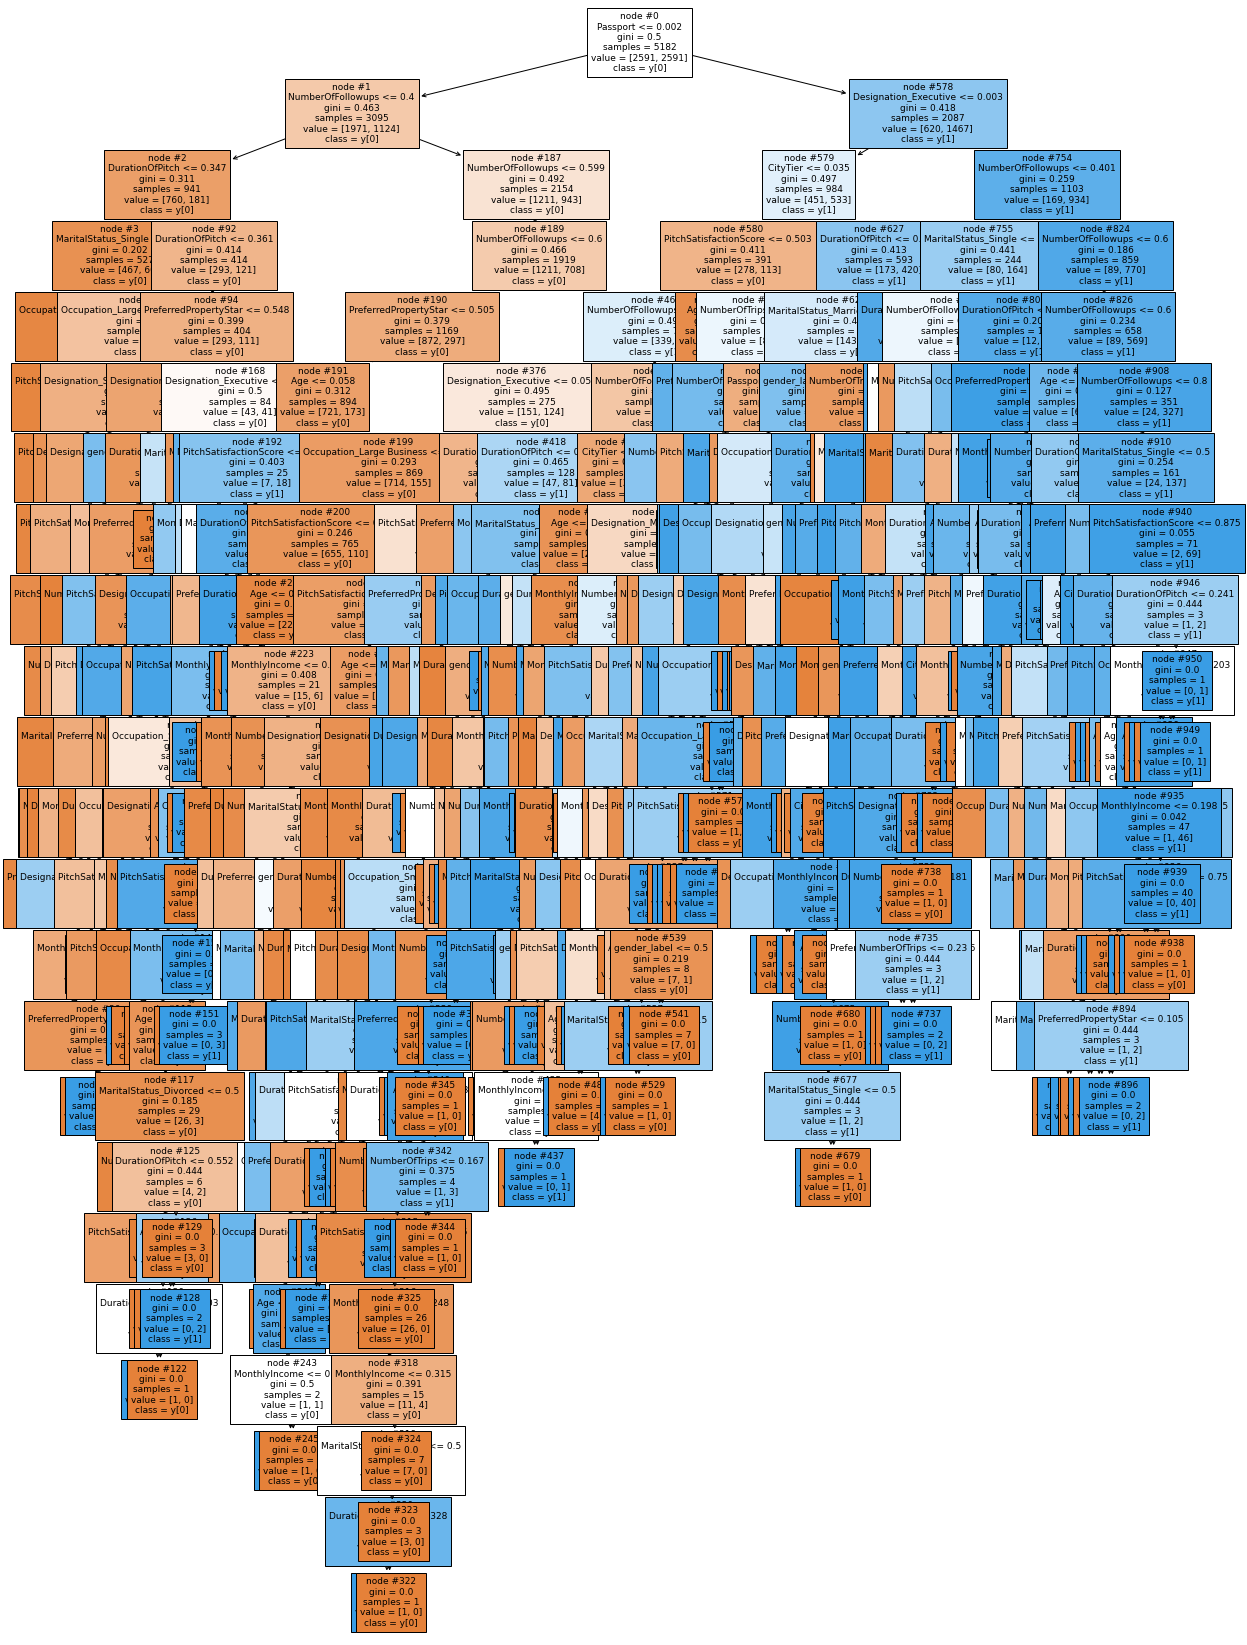

In [74]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

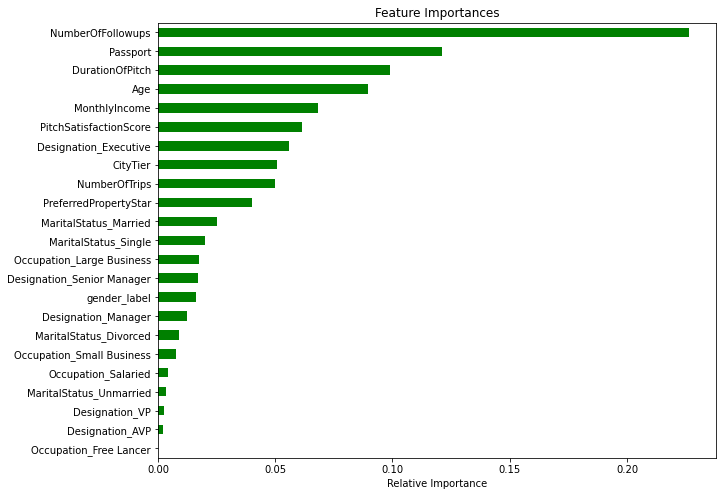

In [75]:
show_feature_importance(dtree)

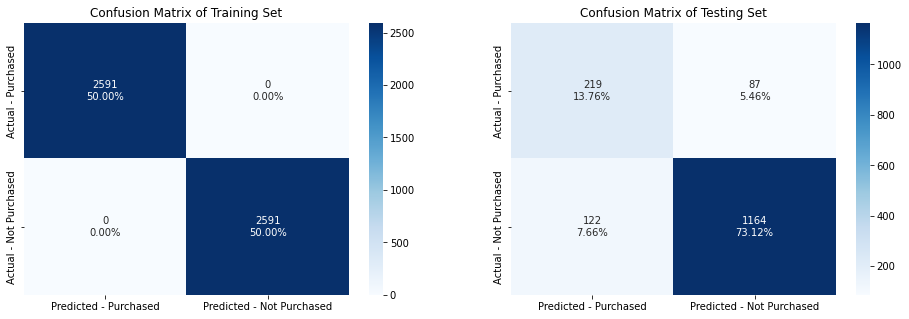

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [76]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(dtree, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(dtree, Xtest, ytest, i = 1, seg = 'Testing')

- overfitting, complex decision tree

3 fitur paling tinggi importancenya: NumberofFollowups, Passport, DurationofPitch

## Dtree - GridSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
dtreet = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=42)

# List of hyperparameter
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
scorer = metrics.make_scorer(metrics.precision_score) 

# Init model
grid_obj = RandomizedSearchCV(dtreet, hyperparameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(Xtrain, ytrain)
dtreet = grid_obj.best_estimator_

# Fit Model & Evaluasi
dtreet.fit(Xtrain, ytrain)
dtreet_score = eval_classification(dtreet, Xtrain, ytrain, Xtest, ytest)
add_score_model(dtreet_score)


Accuracy on training set :  0.8116557313778464
Accuracy on test set :  0.6193467336683417
Recall on training set :  0.9764569664222308
Recall on test set :  0.803921568627451
Precision on training set :  0.7343976777939042
Precision on test set :  0.3106060606060606
F1 on training set :  0.8383035122597746
F1 on test set :  0.4480874316939891
ROC-AUC Score on training set :  0.8116557313778463
ROC-AUC Score on test set :  0.6896746256823103


['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'MonthlyIncome', 'gender_label', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


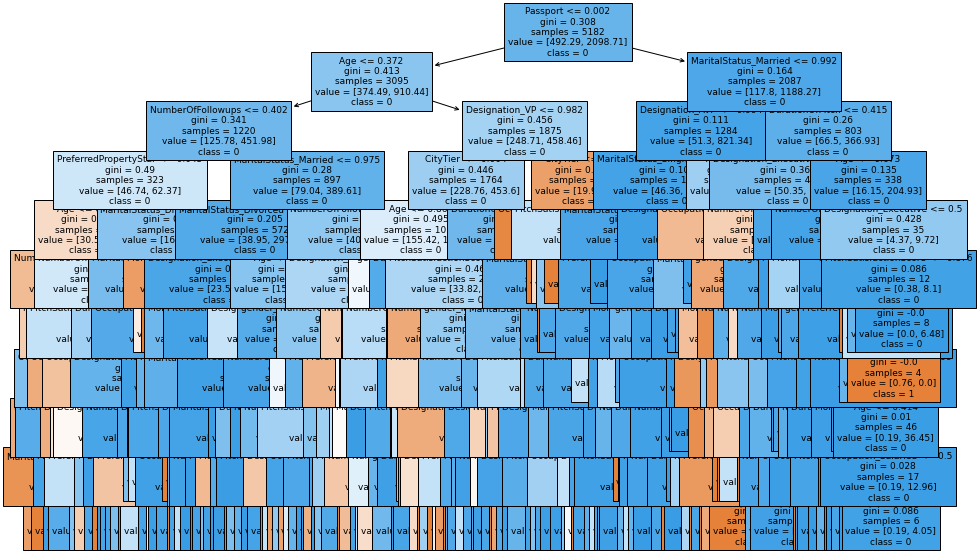

In [78]:
## visualisasi decision tree
feature_names = list(Xtrain.columns)
print(feature_names)
from sklearn import tree

plt.figure(figsize=(15,10))
feature_names = Xtrain.columns
out = tree.plot_tree(dtreet,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

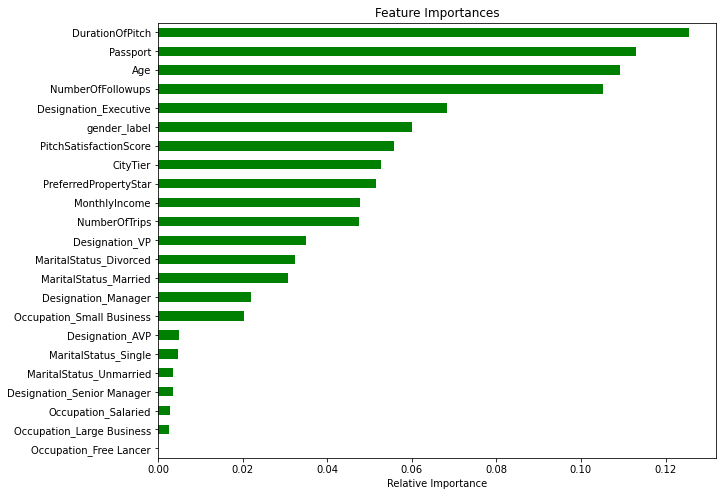

In [79]:
show_feature_importance(dtreet)

-3 fitur penting: Passport, NumberofFollowups, DurationOfPitch

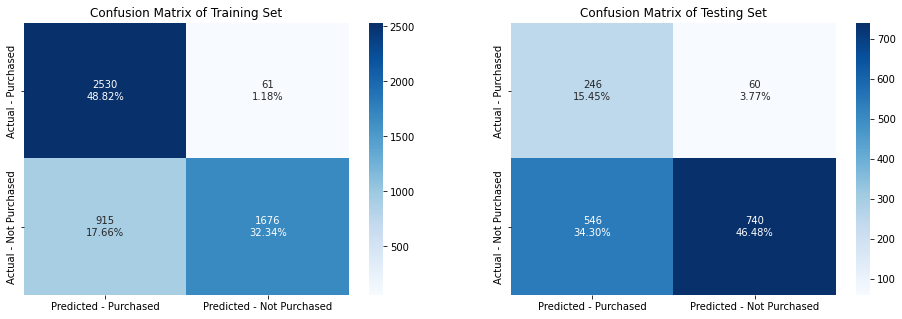

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [80]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(dtreet, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(dtreet, Xtest, ytest, i = 1, seg = 'Testing')

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [82]:
rf_score = eval_classification(rf, Xtrain, ytrain, Xtest, ytest)
add_score_model(rf_score)

Accuracy on training set :  1.0
Accuracy on test set :  0.9164572864321608
Recall on training set :  1.0
Recall on test set :  0.6993464052287581
Precision on training set :  1.0
Precision on test set :  0.8392156862745098
F1 on training set :  1.0
F1 on test set :  0.7629233511586453
ROC-AUC Score on training set :  1.0
ROC-AUC Score on test set :  0.8337323005926061


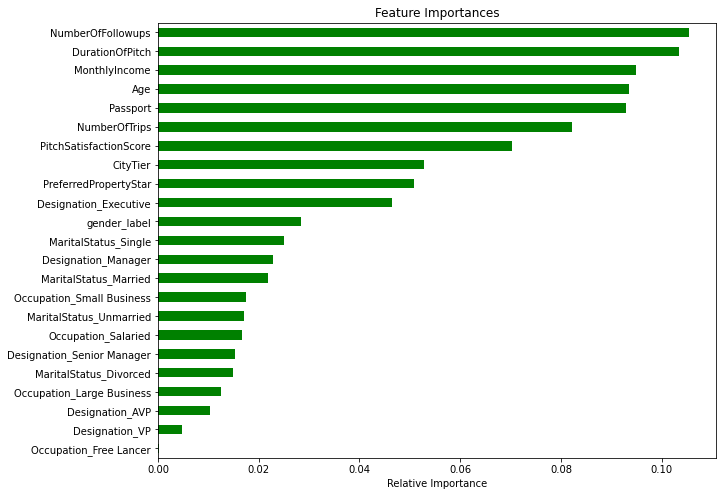

In [83]:
show_feature_importance(rf)

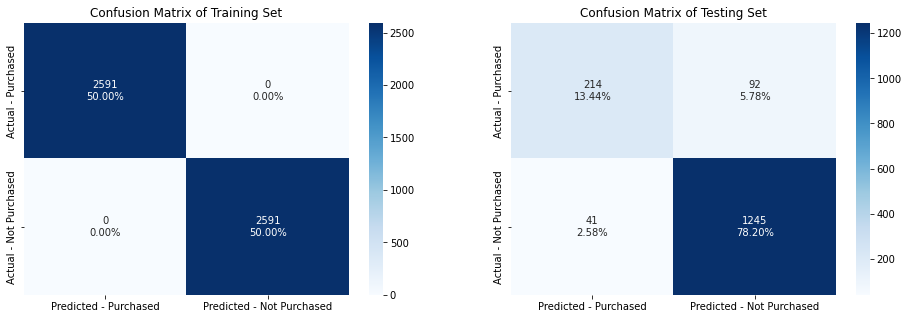

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [84]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(rf, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(rf, Xtest, ytest, i = 1, seg = 'Testing')

3 fitur paling tinggi importancenya: NumberOfFollowups, DurationPitch, MonthlyIncome

## Random Forest - GridSearchCV (BELUM BERHASIL RUN)

In [85]:
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
#hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)], # Jumlah subtree 
                       #bootstrap = [True, False], # Apakah pakai bootstrapping atau tidak
                       #criterion = ['gini','entropy'],
                       #max_depth = [13,14,15,16,17,18,19,20,21],  # Maximum kedalaman tree
                       #min_samples_split = [1.0,1.5,2,2.5], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       #min_samples_leaf = [1,2,3,4], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       #max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       #n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      #)

#scorer = metrics.make_scorer(metrics.precision_score)

# Init model
#rft = RandomForestClassifier(random_state=42)
#grid_obj = GridSearchCV(rft, hyperparameters, scoring=scorer,n_jobs=-1)
#grid_obj = grid_obj.fit(Xtrain, ytrain)
#rft = grid_obj.best_estimator_

# Fit Model & Evaluasi
#rft.fit(Xtrain,ytrain)
#rft_score = eval_classification(rft, Xtrain, ytrain, Xtest, ytest)
#add_score_model(rft_score)

In [86]:
#def show_feature_importance(model):
    #feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    #ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8),  color='green', align='center')
    #ax.invert_yaxis()

    #plt.title('Feature Importances')
    #plt.xlabel('Relative Importance')


In [87]:
#show_feature_importance(rft.best_estimator_)

3 fitur paling tinggi importancenya: Age,  Monthly Income, DurationofPitch

## Random Forest - RandomizedSearchCV

In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)], # Jumlah subtree 
                       bootstrap = [True, False], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [13,14,15,16,17,18,19,20,21],  # Maximum kedalaman tree
                       min_samples_split = [1.0,1.5,2,2.5], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [1,2,3,4], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init Model
rf = RandomForestClassifier(random_state=42)
rft = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')


# Fit Model & Evaluasi
rft.fit(Xtrain,ytrain)
rft_score = eval_classification(rft, Xtrain, ytrain, Xtest, ytest)
add_score_model(rft_score)

Accuracy on training set :  0.9998070243149363
Accuracy on test set :  0.9271356783919598
Recall on training set :  1.0
Recall on test set :  0.738562091503268
Precision on training set :  0.9996141975308642
Precision on test set :  0.8625954198473282
F1 on training set :  0.9998070615473663
F1 on test set :  0.7957746478873239
ROC-AUC Score on training set :  0.9998070243149364
ROC-AUC Score on test set :  0.8552841561715407


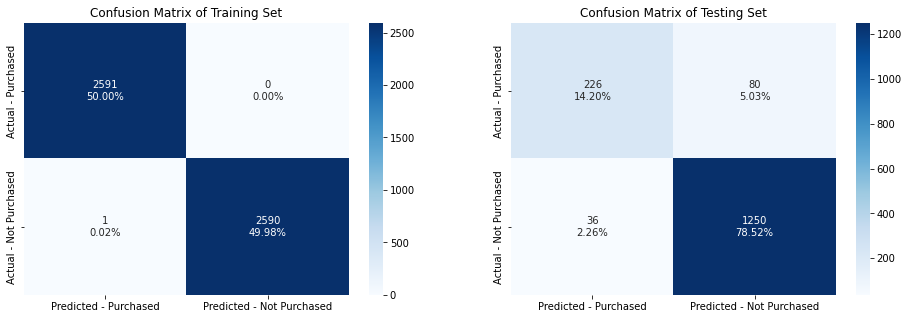

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(rft, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(rft, Xtest, ytest, i = 1, seg = 'Testing')

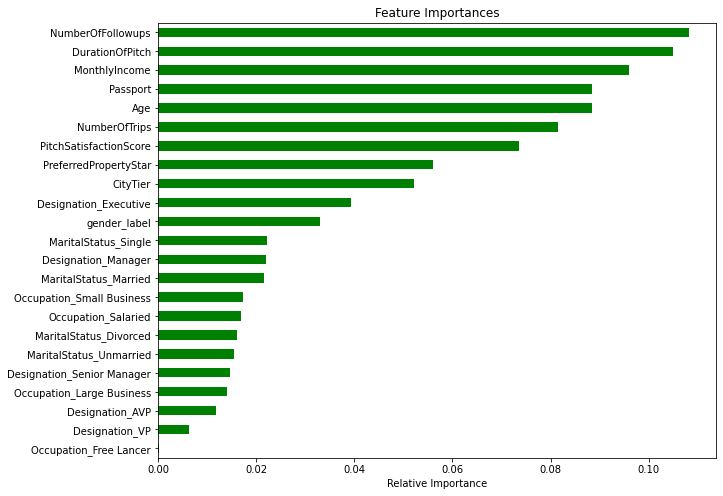

In [ ]:
show_feature_importance(rft.best_estimator_)

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(Xtrain,ytrain)

ab_score = eval_classification(ab, Xtrain, ytrain, Xtest, ytest)
add_score_model(ab_score)

Accuracy on training set :  0.8448475492087997
Accuracy on test set :  0.800251256281407
Recall on training set :  0.828251640293323
Recall on test set :  0.5555555555555556
Precision on training set :  0.856686626746507
Precision on test set :  0.48295454545454547
F1 on training set :  0.8422291993720564
F1 on test set :  0.5167173252279635
ROC-AUC Score on training set :  0.8448475492087998
ROC-AUC Score on test set :  0.7070157249006394


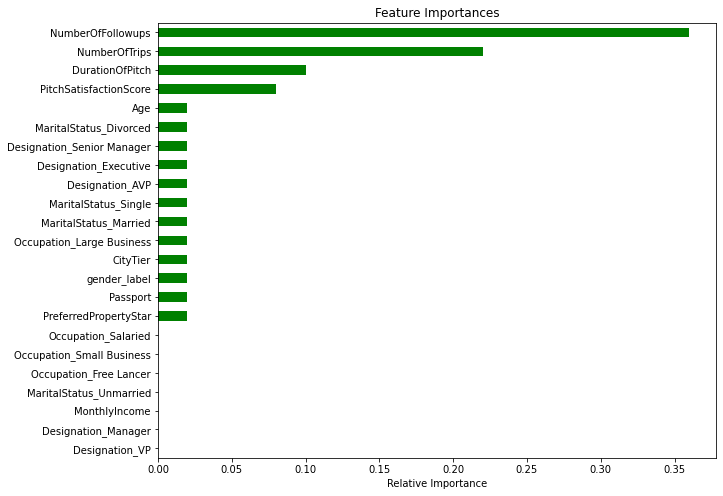

In [ ]:
show_feature_importance(ab)

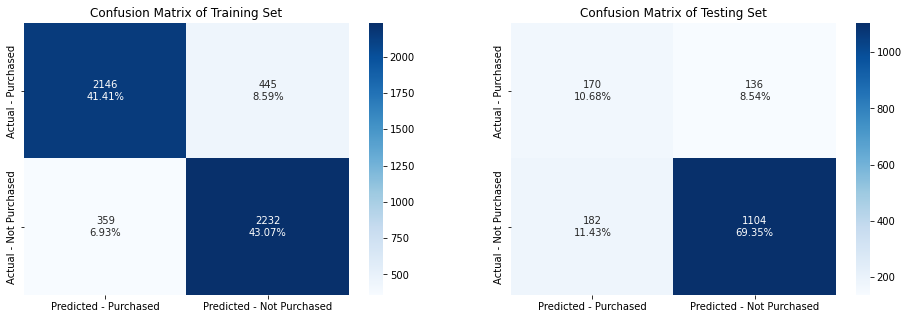

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(ab, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(ab, Xtest, ytest, i = 1, seg = 'Testing')

- importance paling tinggi adalah monthly income

## Adaboost - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
abt = AdaBoostClassifier(random_state=42)
abt = RandomizedSearchCV(abt, hyperparameters, random_state=42, cv=5, scoring='precision')
abt.fit(Xtrain,ytrain)


# Fit Model & Evaluasi
abt.fit(Xtrain,ytrain)
abt_score = eval_classification(abt, Xtrain, ytrain, Xtest, ytest)
add_score_model(abt_score)

Accuracy on training set :  0.8585488228483211
Accuracy on test set :  0.8146984924623115
Recall on training set :  0.8313392512543419
Recall on test set :  0.5392156862745098
Precision on training set :  0.8791836734693877
Precision on test set :  0.5172413793103449
F1 on training set :  0.8545923427891291
F1 on test set :  0.528
ROC-AUC Score on training set :  0.8585488228483211
ROC-AUC Score on test set :  0.7097322599335224


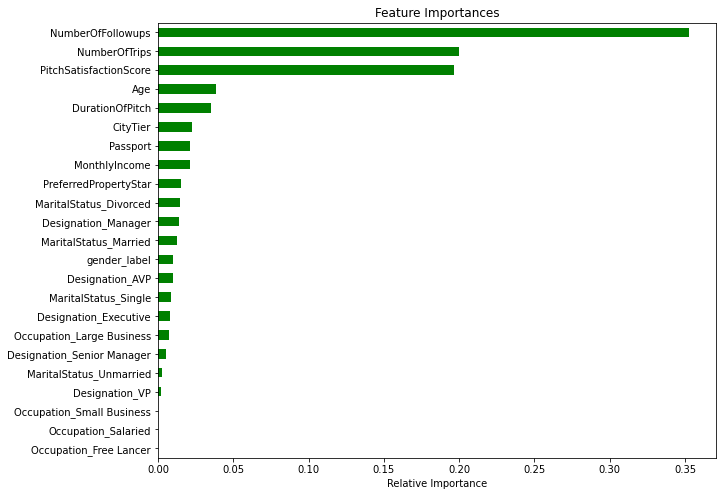

In [ ]:
show_feature_importance(abt.best_estimator_)

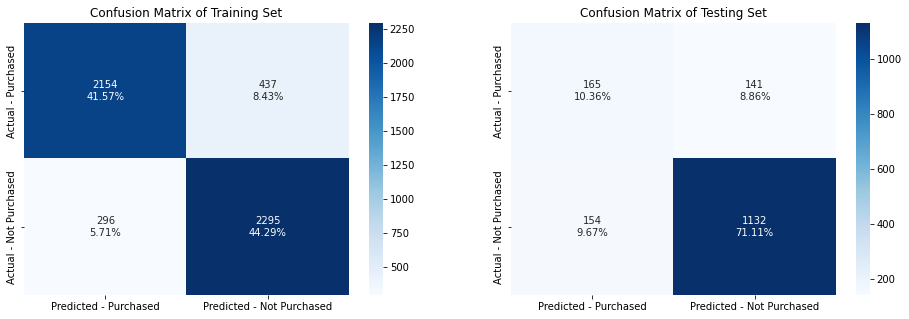

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(abt, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(abt, Xtest, ytest, i = 1, seg = 'Testing')

fitur dengan importance paling tinggi adalah: monthly income

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(Xtrain, ytrain)

xg_score = eval_classification(xg, Xtrain, ytrain, Xtest, ytest)
add_score_model(xg_score)

Accuracy on training set :  0.9087225009648784
Accuracy on test set :  0.8498743718592965
Recall on training set :  0.8722500964878426
Recall on test set :  0.5
Precision on training set :  0.9408825978351374
Precision on test set :  0.6401673640167364
F1 on training set :  0.9052673743240537
F1 on test set :  0.5614678899082569
ROC-AUC Score on training set :  0.9087225009648785
ROC-AUC Score on test set :  0.7165629860031104


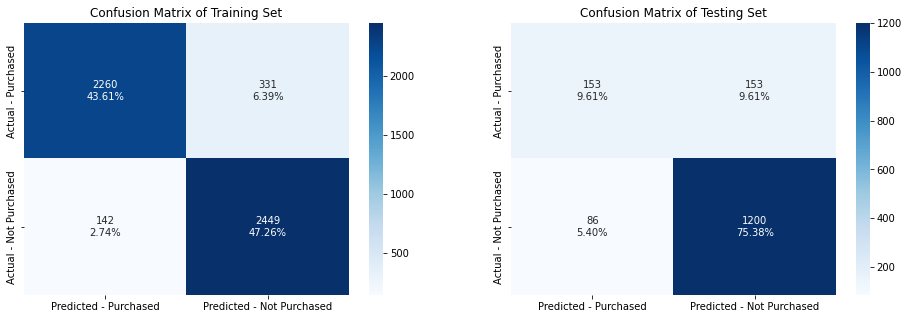

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(xg, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(xg, Xtest, ytest, i = 1, seg = 'Testing')

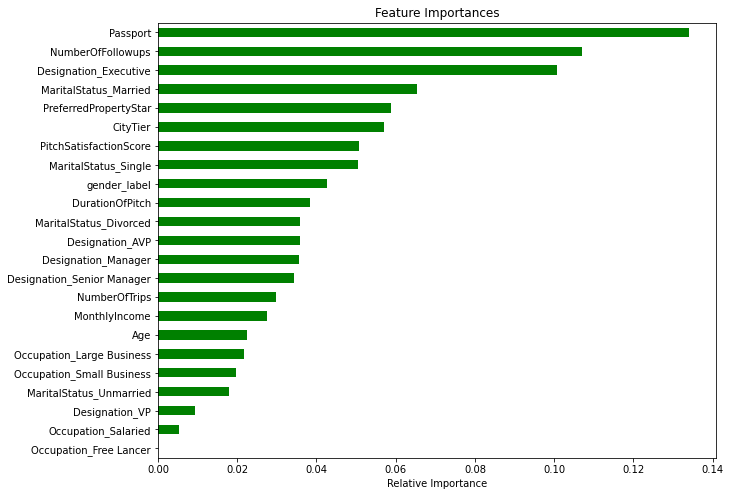

In [ ]:
show_feature_importance(xg)

## XGBoost - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xgt = XGBClassifier(random_state=42)
xgt = RandomizedSearchCV(xgt, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
xgt.fit(Xtrain,ytrain)
xgt_score = eval_classification(xgt, Xtrain, ytrain, Xtest, ytest)
add_score_model(xgt_score)

Accuracy on training set :  0.9147047472018526
Accuracy on test set :  0.8442211055276382
Recall on training set :  0.8406020841373987
Recall on test set :  0.2973856209150327
Precision on training set :  0.9868599909379248
Precision on test set :  0.7338709677419355
F1 on training set :  0.9078782826177574
F1 on test set :  0.4232558139534884
ROC-AUC Score on training set :  0.9147047472018526
ROC-AUC Score on test set :  0.6358623283424308


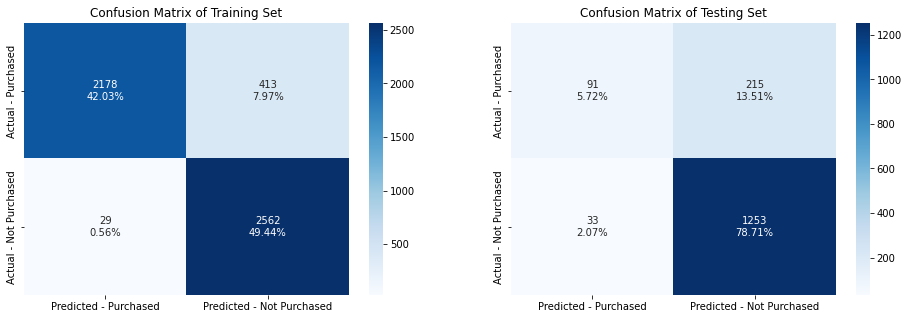

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(xgt, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(xgt, Xtest, ytest, i = 1, seg = 'Testing')

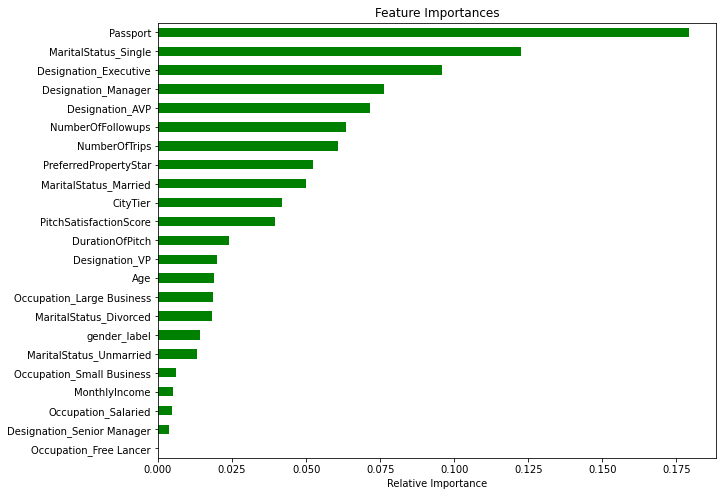

In [ ]:
show_feature_importance(xgt.best_estimator_)

fitur paling penting adalah product pitched basic, dan passport

## Stacking

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=5, scoring_fit='precision', scoring_test=precision_score):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    score = scoring_test(y_test_data, pred)
    return [best_model, pred, score]

In [ ]:
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(random_state=42), XGBClassifier(random_state=42)]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,Xtrain.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(Xtrain, Xtest, ytrain, ytest,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.4013840830449827
Model: KNeighborsClassifier, Score: 0.8154362416107382
Model: DecisionTreeClassifier, Score: 0.3665254237288136
Model: RandomForestClassifier, Score: 0.844
Model: AdaBoostClassifier, Score: 0.5172413793103449
Model: XGBClassifier, Score: 0.7338709677419355


In [ ]:
models_preds_scores

[[LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  array([0, 1, 1, ..., 0, 1, 0]),
  0.4013840830449827],
 [KNeighborsClassifier(algorithm='auto', leaf_size=9, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                       weights='uniform'),
  array([1, 0, 1, ..., 0, 0, 0]),
  0.8154362416107382],
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=20.0, max_features=22, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=0.2,
                         min_samples_split=0.30000000000000004

In [ ]:
# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression(C=3792.690190732246)))
level1.append(('knn', KNeighborsClassifier(algorithm='auto', leaf_size=9, n_neighbors=2, p=1)))
level1.append(('dt', DecisionTreeClassifier(max_depth=20.0, max_features=22, min_samples_leaf=0.2, min_samples_split=0.30000000000000004)))
level1.append(('rf', RandomForestClassifier(max_depth=110, max_features='log2', min_samples_leaf=1, min_samples_split=4, n_estimators=400, n_jobs=-1)))
level1.append(('ab', AdaBoostClassifier(learning_rate=0.07394736842105264, n_estimators=1700, random_state=42)))

# define level-2 algorithm
level2 = XGBClassifier(alpha=0.30000000000000004, base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
                eta=0.13131313131313133, gamma=0.4, learning_rate=0.1,
                max_delta_step=0, max_depth=90, min_child_weight=6, missing=None,
                n_estimators=100, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=42, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=1, tree_method='hist', verbosity=1)

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(Xtrain,ytrain)
stack_score = eval_classification(stacking_model, Xtrain, ytrain, Xtest, ytest)
add_score_model(stack_score)

Accuracy on training set :  0.999421072944809
Accuracy on test set :  0.9265075376884422
Recall on training set :  0.998842145889618
Recall on test set :  0.7941176470588235
Precision on training set :  1.0
Precision on test set :  0.8181818181818182
F1 on training set :  0.9994207375941302
F1 on test set :  0.8059701492537314
ROC-AUC Score on training set :  0.999421072944809
ROC-AUC Score on test set :  0.8760634891592718


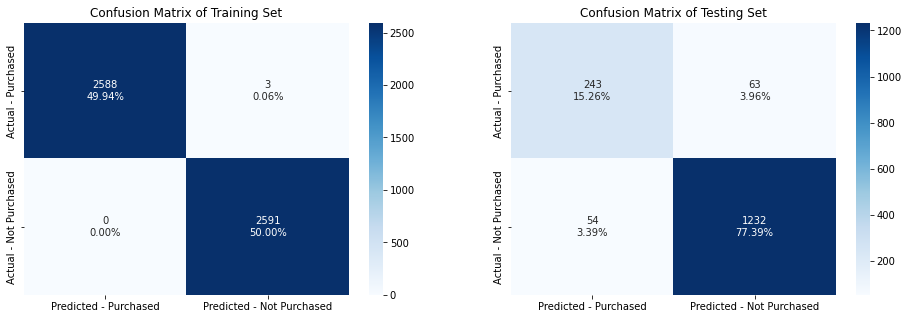

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
confusion_matrix(stacking_model, Xtrain, ytrain, i = 0, seg = 'Training')
confusion_matrix(stacking_model, Xtest, ytest, i = 1, seg = 'Testing')

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'Logistic Regression - GridSearchCV',
                                          'kNN',
                                          'kNN - GridSearchCV',
                                          'Decision Tree',
                                          'Decision Tree - GridSearchCV',
                                          'Random Forest',
                                          'Random Forest - RandomizedSearchCV',
                                          'Adaboost',
                                          'Adaboost - RandomizedSearchCV', 
                                          'XGBoost',
                                          'XGBoost - RandomizedSearchCV',
                                          'Stacking'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

In [ ]:
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Precision',ascending=False).style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'pink',axis = 0) 

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
7,Random Forest - RandomizedSearchCV,0.999807,0.927136,1.000000,0.738562,0.999614,0.862595,0.999807,0.795775
6,Random Forest,1.000000,0.916457,1.000000,0.699346,1.000000,0.839216,1.000000,0.762923
12,Stacking,0.999421,0.926508,0.998842,0.794118,1.000000,0.818182,0.999421,0.805970
3,kNN - GridSearchCV,0.995176,0.925879,0.990351,0.794118,1.000000,0.815436,0.995152,0.804636
11,XGBoost - RandomizedSearchCV,0.914705,0.844221,0.840602,0.297386,0.986860,0.733871,0.907878,0.423256
4,Decision Tree,1.000000,0.868719,1.000000,0.715686,1.000000,0.642229,1.000000,0.676971
10,XGBoost,0.908723,0.849874,0.872250,0.500000,0.940883,0.640167,0.905267,0.561468
2,kNN,0.942300,0.829146,0.994983,0.895425,0.900140,0.533074,0.945188,0.668293
9,Adaboost - RandomizedSearchCV,0.858549,0.814698,0.831339,0.539216,0.879184,0.517241,0.854592,0.528000
8,Adaboost,0.844848,0.800251,0.828252,0.555556,0.856687,0.482955,0.842229,0.516717


## Insight from Modelling

In [ ]:
df_prodtaken = dfx[dfx['ProdTaken']==1]

In [ ]:
df_prodtaken.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,899,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,899,NaN,NaN,NaN,34.8211,9.85717,18,28,33,41,60
TypeofContact,899,2,Self Enquiry,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,899,NaN,NaN,NaN,1.82759,0.959234,1,1,1,3,3
DurationOfPitch,899,NaN,NaN,NaN,16.3694,7.8495,6,9,15,22,34
Occupation,899,4,Salaried,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,899,2,Male,559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,899,NaN,NaN,NaN,3.93326,1.00333,1,3,4,5,6
ProductPitched,899,5,Basic,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreferredPropertyStar,899,NaN,NaN,NaN,3.72747,0.856152,3,3,3,5,5


Dari Model yang dipilih diperoleh beberapa fitur yang penting dalam memilih customer yang potential yaitu: Number of Follow up, Duration of pitch, Monthly income, Passport, Age, Number of trips, Preferred Property Star, City tier,Designation, Gender, Marital Status, Occupation.

Dengan menggunakan EDA dan data statistik di atas maka disarankan:

1.   Customer yang dipilih untuk ditawarkan produk baru adalah customer dengan:

*   Monthly Income: 18000 - 23000
*   Memiliki passport
*   Age: 28 - 41
*   Number of Trips: 3
*   Preferred Property Star: 3
*   City Tier: 1 and 3
*   Designation: Executive
*   Gender: Male
*   Marital Status: Single and Married
*   Occupation: Salaried


2.   Memberikan saran kepada perusahaan untuk melakukan follow up 3 - 5 kali dan duration of pitch 9 - 22 menit



## Menentukan behaviour dari pembeli package lama

### Overall statistics for Basic package

In [ ]:
df_prodtaken[df_prodtaken['ProductPitched']=='Basic'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,548,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,548,NaN,NaN,NaN,31.6912,8.92853,18,26,30,37,59
TypeofContact,548,2,Self Enquiry,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,548,NaN,NaN,NaN,1.5146,0.834454,1,1,1,2,3
DurationOfPitch,548,NaN,NaN,NaN,15.6365,7.60446,6,9,14,21,32
Occupation,548,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,548,2,Male,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548,NaN,NaN,NaN,3.94708,0.965081,1,3,4,5,6
ProductPitched,548,1,Basic,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreferredPropertyStar,548,NaN,NaN,NaN,3.77007,0.864736,3,3,3,5,5


Dari 548 customer yang sudah mengambil paket Basic dapat dilihat customer:

*   Age group: 26 - 37
*   Contacted by: Self
*   City Tier: 1
*   Occupation: Salaried
*   Gender: Male
*   Marital status: Single
*   Designation: Executive
*   Monthly Income: 17K - 21K

### Overall statistics for Standard package

In [ ]:
df_prodtaken[df_prodtaken['ProductPitched']=='Standard'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,119,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,119,NaN,NaN,NaN,40.6775,9.92772,19,33,37,49,60
TypeofContact,119,2,Self Enquiry,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,119,NaN,NaN,NaN,2.12605,0.96159,1,1,3,3,3
DurationOfPitch,119,NaN,NaN,NaN,18.3487,8.53995,6,11,17,26,34
Occupation,119,3,Small Business,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,119,2,Male,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,119,NaN,NaN,NaN,3.94118,0.914053,1,3,4,4.5,6
ProductPitched,119,1,Standard,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreferredPropertyStar,119,NaN,NaN,NaN,3.70588,0.886365,3,3,3,5,5


Dari 119 customer yang sudah mengambil paket Standard dapat dilihat customer:

*   Age group: 33 - 49
*   Contacted by: Self
*   City Tier: 3
*   Occupation: Small Business
*   Gender: Male
*   Marital status: Married
*   Designation: Senior Manager
*   Monthly Income: 23K - 28K

### Overall statistics for Deluxe package

In [ ]:
df_prodtaken[df_prodtaken['ProductPitched']=='Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,192,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,192,NaN,NaN,NaN,37.7538,8.32652,21,32,36,44,59
TypeofContact,192,2,Self Enquiry,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,192,NaN,NaN,NaN,2.45833,0.891104,1,1,3,3,3
DurationOfPitch,192,NaN,NaN,NaN,17.6239,7.89457,6,11.75,15.4908,22,34
Occupation,192,3,Small Business,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,192,2,Male,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,192,NaN,NaN,NaN,3.9375,1.03663,1,3,4,5,6
ProductPitched,192,1,Deluxe,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreferredPropertyStar,192,NaN,NaN,NaN,3.64583,0.831061,3,3,3,4,5


Dari 192 customer yang sudah mengambil paket Standard dapat dilihat customer:

*   Age group: 32 - 44
*   Contacted by: Self
*   City Tier: 3
*   Occupation: Small Business
*   Gender: Male
*   Marital status: Married
*   Designation: Manager
*   Monthly Income: 20K - 24K

### Overall statistics for Super Deluxe package

In [ ]:
df_prodtaken[df_prodtaken['ProductPitched']=='Super Deluxe'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,20,NaN,NaN,NaN,43.5,4.83953,39,40,42,45.25,56
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20,NaN,NaN,NaN,2.6,0.820783,1,3,3,3,3
DurationOfPitch,20,NaN,NaN,NaN,18.5,7.33054,8,15,18.5,20,31
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20,NaN,NaN,NaN,3.1,1.61897,1,2,3,4,6
ProductPitched,20,1,Super Deluxe,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreferredPropertyStar,20,NaN,NaN,NaN,3.6,0.820783,3,3,3,4,5


Dari 20 customer yang sudah mengambil paket Standard dapat dilihat customer:

*   Age group: 40 - 45
*   Contacted by: Company
*   City Tier: 3
*   Occupation: Salaried
*   Gender: Male
*   Marital status: Single
*   Designation: AVP
*   Monthly Income: 28K - 31K

### Overall statistics for King package

In [ ]:
df_prodtaken[df_prodtaken['ProductPitched']=='King'].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,20,NaN,NaN,NaN,1,0,1,1,1,1,1
Age,20,NaN,NaN,NaN,48.9,9.61851,27,42,52.5,56,59
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20,NaN,NaN,NaN,1.8,1.00525,1,1,1,3,3
DurationOfPitch,20,NaN,NaN,NaN,10.5,4.13585,8,8,9,9,19
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20,NaN,NaN,NaN,4.3,1.12858,3,3,4,5,6
ProductPitched,20,1,King,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreferredPropertyStar,20,NaN,NaN,NaN,3.6,0.680557,3,3,3.5,4,5


Dari 20 customer yang sudah mengambil paket Standard dapat dilihat customer:

*   Age group: 42 - 56
*   Contacted by: Self
*   City Tier: 1
*   Occupation: Small Business
*   Gender: Female
*   Marital status: Single
*   Designation: VP
*   Monthly Income: 34K - 38K